# iNeuron Logistic Regression on Algerian Forest Fire Task - II

## Submitted by Mohammad Wasiq
### E-mail : `gl0427@myamu.ac.in`

## About the Dataset
[**Dataset Link :**](https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++)

The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria. 122 instances for each region.

The period from June 2012 to September 2012.

The dataset includes 11 attribues and 1 output attribue (class)

The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.

**Attribute Information :**
1. **Date :** (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2. **Temp :** temperature noon (temperature max) in Celsius degrees: 22 to 42
3. **RH :** Relative Humidity in %: 21 to 90
4. **Ws :** Wind speed in km/h: 6 to 29
5. **Rain :** total day in mm: 0 to 16.8 FWI Components
6. Fine Fuel Moisture Code **(FFMC)** index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code **(DMC)** index from the FWI system: 1.1 to 65.9
8. Drought Code **(DC)** index from the FWI system: 7 to 220.4
9. Initial Spread Index **(ISI)** index from the FWI system: 0 to 18.5
10. Buildup Index **(BUI)** index from the FWI system: 1.1 to 68
11. Fire Weather Index **(FWI)** Index: 0 to 31.1
12. **Classes :** two classes, namely `fire` and `not fire`

![title](https://www.middleeastmonitor.com/wp-content/uploads/2020/11/fire-algeria-1200x800.jpg)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df= pd.read_csv(r"E:\datasets\Algerian_forest_fires_update.csv", header= 1, skiprows= [124,125,126])
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [3]:
df.shape

(244, 14)

In [4]:
df.drop([122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4    RH          242 non-null    int64  
 5    Ws          242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.6+ KB


In [6]:
### Creating imbalance
### 1. splitting data in 90:10 percent ratio using train test split
X1 = pd.DataFrame(df, columns = ['day', 'month','year','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','region'])
y1=pd.DataFrame(df,columns = ['Classes'])

In [7]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report
from sklearn.metrics import accuracy_score, classification_report

In [8]:
X_train_imb, X_test_imb, y_train_imb, y_test_imb= train_test_split(X1, 
                                                                   y1,
                                                                   test_size= 0.10,
                                                                   random_state= 17)

In [9]:
# Both will have same shape
X_train_imb.shape, y_train_imb.shape

((217, 14), (217, 1))

In [10]:
## Both will have same shape
X_test_imb.shape, y_test_imb.shape

((25, 14), (25, 1))

**Replacing all values as 1 in y_train and all values as zero in y_test to create imbalance**

In [11]:
y_train_imb= y_train_imb.replace(0,1)
y_train_imb.head()

,Classes
156,NaN
183,NaN
11,NaN
75,NaN
130,NaN


In [77]:
y_test_imb=y_test_imb.replace(1,0)
y_test_imb.head()


,Classes
48,0
216,0
101,0
38,0
86,0


In [78]:
X_train_imb.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
156,5,7,2012,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1
183,1,8,2012,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1
11,12,6,2012,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0
75,15,8,2012,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0
130,9,6,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1


In [79]:
### Combining X_train_imb and y_train_imb
train_imb=X_train_imb.join(pd.DataFrame(y_train_imb))
train_imb.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes
156,5,7,2012,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1,1
183,1,8,2012,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1,1
11,12,6,2012,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0,1
75,15,8,2012,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0,1
130,9,6,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1,1


In [80]:
### Combining X_test_imb and y_test_imb
test_imb=X_test_imb.join(pd.DataFrame(y_test_imb))
test_imb.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes
48,19,7,2012,35,59,17,0.0,88.1,12.0,52.8,7.7,18.2,10.9,0,0
216,3,9,2012,28,75,16,0.0,82.2,4.4,24.3,3.3,6.0,2.5,1,0
101,10,9,2012,33,73,12,1.8,59.9,2.2,8.9,0.7,2.7,0.3,0,0
38,9,7,2012,32,68,14,1.4,66.6,7.7,9.2,1.1,7.4,0.6,0,0
86,26,8,2012,31,78,18,0.0,85.8,45.6,190.6,4.7,57.1,13.7,0,0


In [81]:
### Checking the shape of imbalanced Data
train_imb.shape, test_imb.shape

((219, 15), (25, 15))

In [82]:
### Combining train_imb dataset and test_imb dataset into data_imb dataset 
df_imb=pd.concat([train_imb, test_imb], ignore_index=True, sort=False)
df_imb.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes
0,5,7,2012,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1,1
1,1,8,2012,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1,1
2,12,6,2012,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0,1
3,15,8,2012,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0,1
4,9,6,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1,1


In [83]:
df_imb.shape

(244, 15)

### Checking the imbalancing  

In [84]:
df_imb.Classes.value_counts()

1    219
0     25
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='count'>

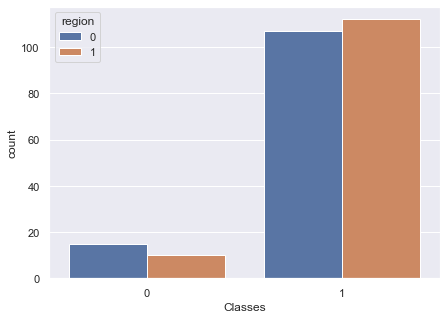

In [85]:
## 0 is 'Bejaia' and 1 is 'Sidi Bel-abbes region'
plt.figure(figsize=(7,5))
sns.countplot(data=df_imb,x='Classes',hue='region')

## Logistic Regression on imbalanced Dataset 

In [86]:
df_imb.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes
0,5,7,2012,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1,1
1,1,8,2012,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1,1
2,12,6,2012,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0,1
3,15,8,2012,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0,1
4,9,6,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1,1


## Separating Independent and Dependent feature 

In [87]:
X1 = df_imb.drop(columns = ['Classes'])
y1 = df_imb['Classes']

In [88]:
X1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,5,7,2012,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1
1,1,8,2012,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1
2,12,6,2012,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0
3,15,8,2012,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0
4,9,6,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,8,2012,33,37,16,0.0,92.2,61.3,167.2,13.1,64.0,30.3,1
240,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
241,2,9,2012,28,67,19,0.0,75.4,2.9,16.3,2.0,4.0,0.8,1
242,11,8,2012,35,63,13,0.0,88.9,21.7,77.0,7.1,25.5,12.1,0


In [89]:
y1

0      1
1      1
2      1
3      1
4      1
      ..
239    0
240    0
241    0
242    0
243    0
Name: Classes, Length: 244, dtype: int32

### Handling Imbalanced Dataset 

### Upsampling 

In [90]:
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


In [91]:

from imblearn.combine import SMOTETomek

In [92]:
smk=SMOTETomek()
smk

SMOTETomek()

In [93]:
X_bal,y_bal=smk.fit_resample(X1,y1)

In [94]:
X_bal.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,5,7,2012,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1
1,1,8,2012,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1
2,12,6,2012,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0
3,15,8,2012,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0
4,9,6,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1


In [95]:
y_bal.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int32

In [96]:
X_bal.shape,y_bal.shape

((416, 14), (416,))

In [97]:
## Creating Balanced data from imbalanced data
data_bal=X_bal.join(pd.DataFrame(y_bal))
data_bal.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes
0,5,7,2012,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1,1
1,1,8,2012,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1,1
2,12,6,2012,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0,1
3,15,8,2012,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0,1
4,9,6,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1,1


## EDA on balanced Dataset 

In [98]:
data_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          416 non-null    int32  
 1   month        416 non-null    int32  
 2   year         416 non-null    int32  
 3   Temperature  416 non-null    int32  
 4   RH           416 non-null    int32  
 5   Ws           416 non-null    int32  
 6   Rain         416 non-null    float64
 7   FFMC         416 non-null    float64
 8   DMC          416 non-null    float64
 9   DC           416 non-null    float64
 10  ISI          416 non-null    float64
 11  BUI          416 non-null    float64
 12  FWI          416 non-null    float64
 13  region       416 non-null    int32  
 14  Classes      416 non-null    int32  
dtypes: float64(7), int32(8)
memory usage: 35.9 KB


## Statistical analysis on Balanced Dataset

In [99]:
data_bal.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes
count,416.000000,416.000000,416.0,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,14.591346,7.459135,2012.0,32.197115,62.447115,15.461538,0.562578,78.786539,14.975214,53.173970,4.714192,17.435347,7.079591,0.310096,0.500000
std,8.723950,0.988251,0.0,3.211364,13.232020,2.638631,1.570633,12.391006,12.658186,49.658347,3.750749,14.794149,7.062710,0.463090,0.500602
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,7.000000,7.000000,2012.0,30.000000,54.000000,14.000000,0.000000,72.622743,5.684506,15.024894,1.518279,6.026095,0.753243,0.000000,0.000000
50%,14.000000,7.000000,2012.0,32.000000,64.000000,15.000000,0.000000,83.180680,12.062326,36.900000,3.750000,14.200000,4.900000,0.000000,0.500000
75%,23.000000,8.000000,2012.0,34.000000,71.000000,17.000000,0.433524,87.982705,20.817084,76.606373,7.164006,23.512994,11.907136,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [100]:
data_bal.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes
day,1.000000,-0.066225,NaN,0.167505,-0.133637,0.148065,-0.084515,0.284472,0.582174,0.623921,0.282523,0.611107,0.455532,0.049933,0.150077
month,-0.066225,1.000000,NaN,-0.084772,0.078426,-0.009383,0.022501,0.023551,0.031176,0.091210,0.066407,0.046636,0.075252,0.004063,0.002435
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.167505,-0.084772,NaN,1.000000,-0.648538,-0.272098,-0.283493,0.665275,0.430808,0.339503,0.635420,0.410812,0.565477,0.222909,-0.037472
RH,-0.133637,0.078426,NaN,-0.648538,1.000000,0.218445,0.191642,-0.595837,-0.339929,-0.189220,-0.656715,-0.290872,-0.529086,-0.381319,-0.053475
Ws,0.148065,-0.009383,NaN,-0.272098,0.218445,1.000000,0.090406,-0.053194,0.150747,0.254008,0.076639,0.197349,0.134114,-0.133186,0.009121
Rain,-0.084515,0.022501,NaN,-0.283493,0.191642,0.090406,1.000000,-0.533911,-0.251949,-0.277874,-0.337909,-0.267525,-0.309109,0.036448,0.177089
FFMC,0.284472,0.023551,NaN,0.665275,-0.595837,-0.053194,-0.533911,1.000000,0.589623,0.537794,0.772250,0.590636,0.716276,0.149906,-0.093970
DMC,0.582174,0.031176,NaN,0.430808,-0.339929,0.150747,-0.251949,0.589623,1.000000,0.897287,0.658820,0.984361,0.867633,0.105301,-0.069720
DC,0.623921,0.091210,NaN,0.339503,-0.189220,0.254008,-0.277874,0.537794,0.897287,1.000000,0.543064,0.954695,0.777686,-0.108816,-0.134493


In [101]:
data_bal.cov()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes
day,76.107298,-0.570957,0.0,4.692794,-15.426483,3.408341,-1.158034,30.750996,64.289162,270.293322,9.244525,78.871596,28.067480,0.201726,0.655422
month,-0.570957,0.976639,0.0,-0.269034,1.025544,-0.024467,0.034926,0.288395,0.389989,4.476116,0.246149,0.681838,0.525238,0.001859,0.001205
year,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Temperature,4.692794,-0.269034,0.0,10.312859,-27.558225,-2.305653,-1.429904,26.472631,17.512360,54.140829,7.653651,19.517448,12.825555,0.331499,-0.060241
RH,-15.426483,1.025544,0.0,-27.558225,175.086353,7.626877,3.982819,-97.692245,-56.935920,-124.332778,-32.592782,-56.940170,-49.445157,-2.336573,-0.354217
Ws,3.408341,-0.024467,0.0,-2.305653,7.626877,6.962373,0.374673,-1.739208,5.034986,33.282702,0.758485,7.703760,2.499329,-0.162743,0.012048
Rain,-1.158034,0.034926,0.0,-1.429904,3.982819,0.374673,2.466889,-10.390838,-5.009101,-21.672823,-1.990638,-6.216249,-3.428919,0.026510,0.139238
FFMC,30.750996,0.288395,0.0,26.472631,-97.692245,-1.739208,-10.390838,153.537019,92.480958,330.913724,35.890764,108.272039,62.684266,0.860183,-0.582892
DMC,64.289162,0.389989,0.0,17.512360,-56.935920,5.034986,-5.009101,92.480958,160.229675,564.020922,31.279238,184.338360,77.567301,0.617258,-0.441794
DC,270.293322,4.476116,0.0,54.140829,-124.332778,33.282702,-21.672823,330.913724,564.020922,2465.951471,101.149026,701.369621,272.752086,-2.502360,-3.343363


In [102]:
num_bal_col=[feature for feature in data_bal.columns if data_bal[feature].dtype != 'O']
num_bal_col

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'region',
 'Classes']

## Compairing the feature for Original and Balanced Dataset 

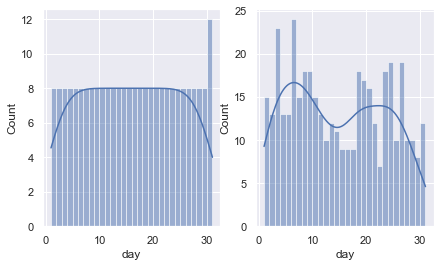

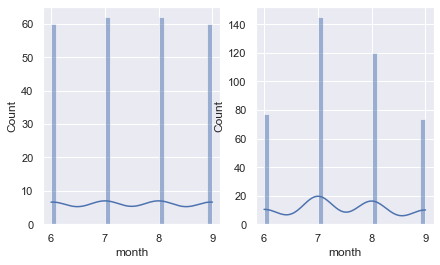

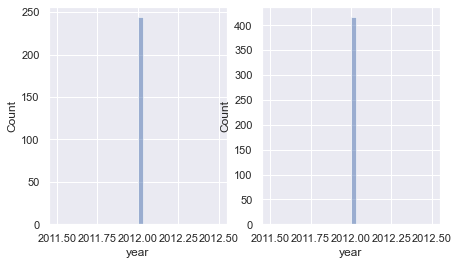

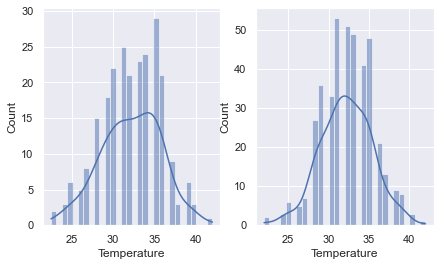

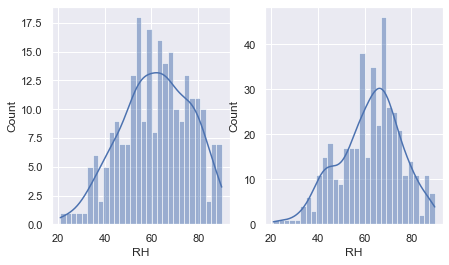

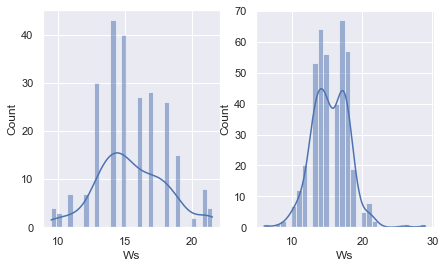

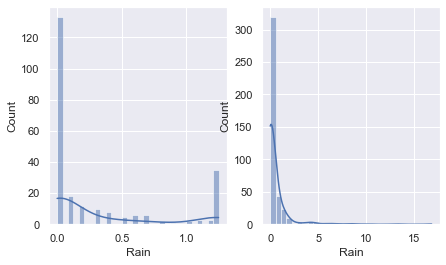

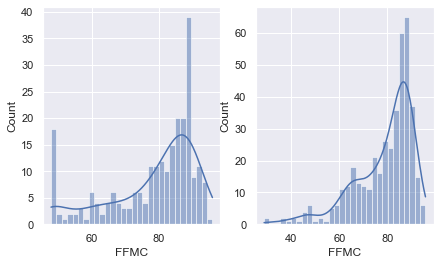

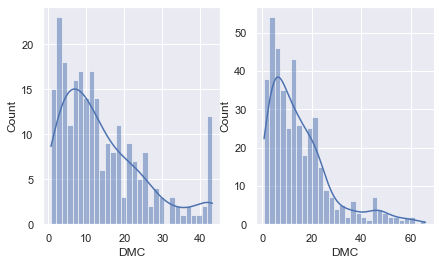

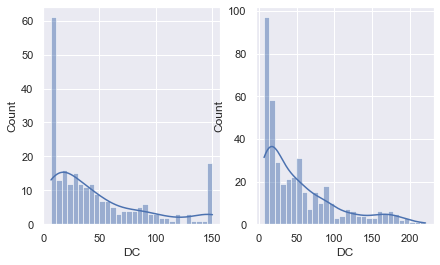

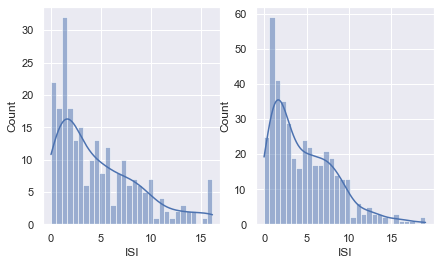

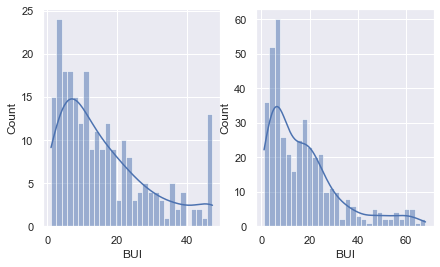

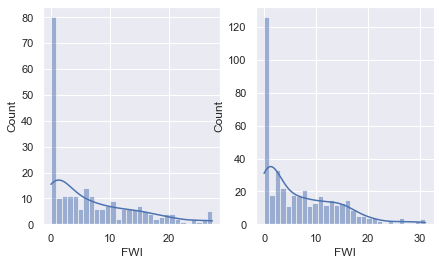

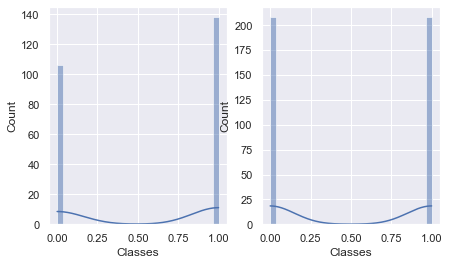

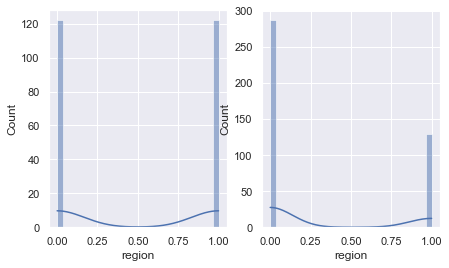

In [103]:
for i in num_col:
    plt.figure(figsize=(7,4))
    plt.subplot(121)
    sns.histplot(data=data,x=i,kde=True,bins=30)
    
    
    plt.subplot(122)
    sns.histplot(data=data_bal,x=i,kde=True,bins=30)
    

# Checking the Outliers for Original and Balanced Dataset 

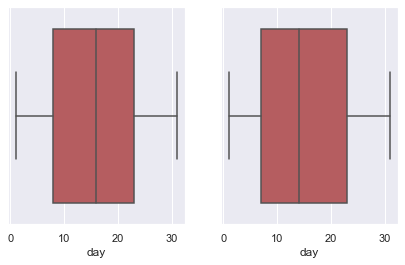

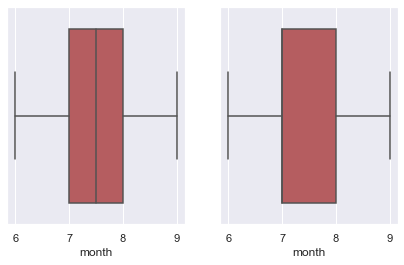

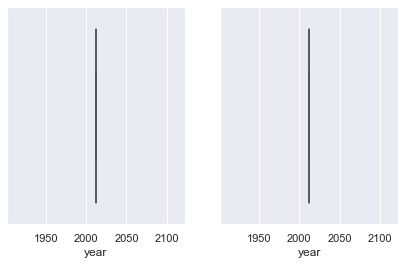

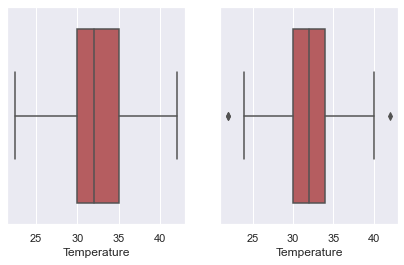

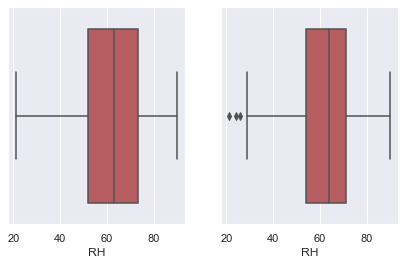

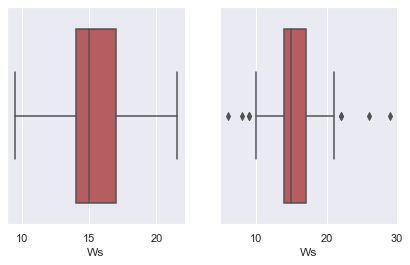

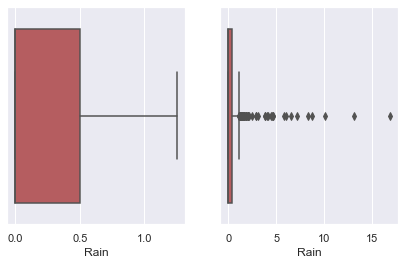

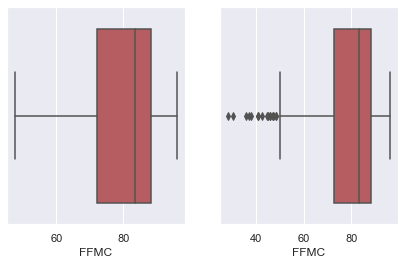

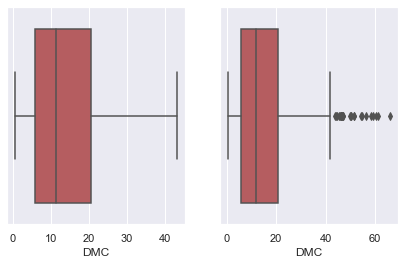

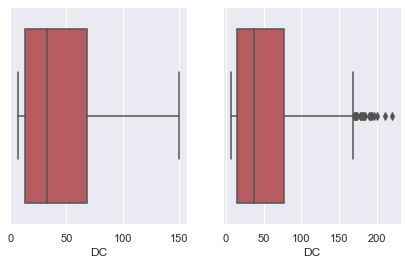

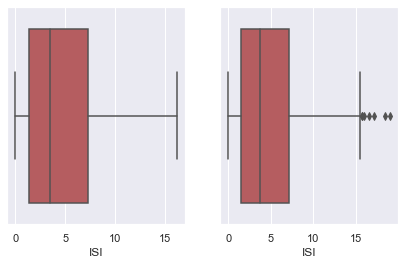

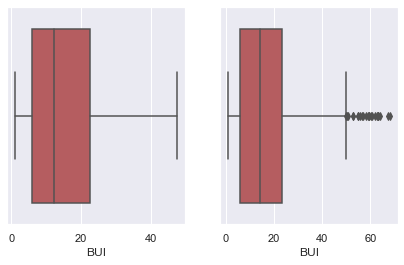

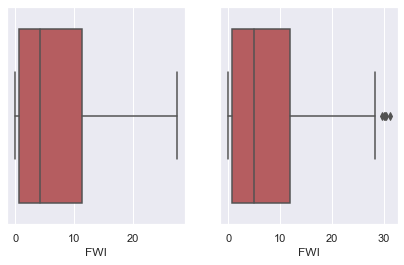

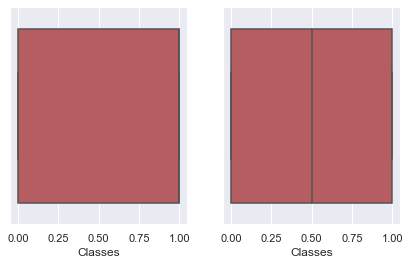

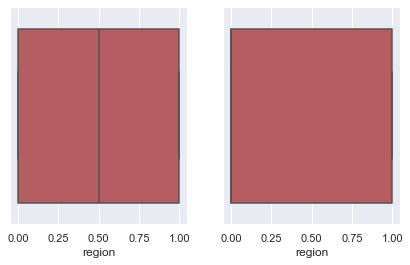

In [104]:
for i in num_col:
    plt.figure(figsize=(7,4))
    plt.subplot(121)
    sns.boxplot(data=data,x=i,color='r')
    
    
    plt.subplot(122)
    sns.boxplot(data=data_bal,x=i,color='r')

## Test train Split 

In [105]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X_bal,y_bal,test_size=0.30,random_state=16)

In [106]:
X_train1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
46,15,8,2012,35,46,13,0.300000,83.900000,16.900000,54.200000,3.500000,19.000000,5.500000,1
7,21,8,2012,36,58,19,0.000000,88.600000,29.600000,141.100000,9.200000,38.800000,18.400000,0
246,6,7,2012,30,70,14,0.858817,72.630324,6.424355,15.037045,1.950430,6.858817,1.334463,0
403,8,7,2012,31,68,14,1.276085,66.771574,7.147149,9.819574,1.128596,6.971064,0.590468,0
350,9,6,2012,31,69,14,1.340744,65.462275,7.492602,9.128892,1.046669,7.204454,0.570372,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,23,7,2012,32,62,18,0.000000,85.526423,14.303563,94.038546,5.978328,20.664275,9.416180,0
69,15,6,2012,28,90,15,0.000000,66.800000,7.200000,14.700000,1.200000,7.100000,0.600000,1
121,14,7,2012,34,61,13,0.600000,73.900000,7.800000,22.900000,1.400000,8.400000,0.800000,0
238,18,8,2012,35,56,18,0.000000,89.181924,21.169680,114.805542,9.521574,28.927406,16.238776,0


In [107]:
X_test1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
307,4,8,2012,31,71,15,0.056344,75.646935,4.650343,17.489906,2.535062,5.213781,1.984312,0
310,8,7,2012,32,68,13,1.174137,69.568488,7.780665,10.910107,1.567860,7.529065,1.132392,0
412,3,9,2012,28,73,16,0.053488,74.818676,3.062804,19.700044,2.283731,4.341876,1.430243,0
163,24,8,2012,35,38,15,0.000000,92.100000,51.300000,147.700000,12.200000,54.900000,26.900000,1
178,3,7,2012,32,76,20,0.700000,63.100000,2.600000,9.200000,1.300000,3.000000,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,20,8,2012,35,61,18,0.000000,88.209272,27.144370,134.529342,8.297587,35.914480,15.332642,0
199,2,7,2012,27,75,19,1.200000,55.700000,2.400000,8.300000,0.800000,2.800000,0.300000,0
12,5,6,2012,32,60,14,0.200000,77.100000,6.000000,17.600000,1.800000,6.500000,0.900000,1
339,20,7,2012,34,59,17,0.257611,84.516862,14.084309,53.689930,6.271429,19.019672,8.932787,0


In [108]:
y_train1

46     1
7      1
246    0
403    0
350    0
      ..
321    0
69     1
121    1
238    0
169    1
Name: Classes, Length: 291, dtype: int32

In [109]:
y_test1

307    0
310    0
412    0
163    1
178    1
      ..
320    0
199    1
12     1
339    0
133    1
Name: Classes, Length: 125, dtype: int32

## Logistic Regression Model 

In [110]:
from sklearn.linear_model import LogisticRegression
classifier_bal=LogisticRegression()
classifier_bal

LogisticRegression()

In [111]:
from sklearn.model_selection import GridSearchCV
parameter_bal={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [112]:
classifier_regressor_bal=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

## Standarizing or Feature Scaling 

In [113]:
classifier_regressor_bal.fit(X_train1,y_train1)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [114]:
print(classifier_regressor_bal.best_params_)

{'C': 1, 'max_iter': 300, 'penalty': 'l2'}


In [115]:
print(classifier_regressor_bal.best_score_)

0.7489772063120983


## Prediction 

In [116]:
y_bal_pred = classifier_regressor_bal.predict(X_test1)

In [117]:
y_bal_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1])

## Acurracy 

In [118]:

from sklearn.metrics import accuracy_score,classification_report
bal_score=accuracy_score(y_bal_pred,y_test1)
print(bal_score)

0.704


## Classification Report 

In [119]:
print(classification_report(y_bal_pred,y_test1))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72        66
           1       0.69      0.68      0.68        59

    accuracy                           0.70       125
   macro avg       0.70      0.70      0.70       125
weighted avg       0.70      0.70      0.70       125



## Performance Metrics 

## Confusion Metrics 

In [120]:
conf_mat_bal=confusion_matrix(y_bal_pred,y_test1)

In [121]:
conf_mat_bal

array([[48, 18],
       [19, 40]], dtype=int64)

In [122]:
true_positive = conf_mat_bal[0][0]
false_positive = conf_mat_bal[0][1]
false_negative = conf_mat_bal[1][0]
true_negative = conf_mat_bal[1][1]

## Precision 

In [123]:
bal_Precision = true_positive/(true_positive+false_positive)
bal_Precision

0.7272727272727273

## Recall 

In [124]:
bal_recall = true_positive/(true_positive+false_negative)
bal_recall

0.7164179104477612

## F1 score 

In [125]:
F1_Score_bal = 2*(bal_recall * bal_Precision) / (bal_recall + bal_Precision)
F1_Score_bal

0.7218045112781953

# Conclusion

### Performance of Logistic Model on Original Dataset

In [126]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        25
         1.0       0.95      0.97      0.96        36

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61



### Performance of Logistic Model on Balanced Dataset which are created from imbalanced dataset 

In [127]:
print(classification_report(y_bal_pred,y_test1))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72        66
           1       0.69      0.68      0.68        59

    accuracy                           0.70       125
   macro avg       0.70      0.70      0.70       125
weighted avg       0.70      0.70      0.70       125



## Observation

It seems that model is good when we predict from original dataset

It seems that model is very bad when we try to predict from balanced(created from an imbalanced dataset )